In [15]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

In [86]:
from user_agents import parse
from time import sleep

url = 'https://www.kinopoisk.ru/lists/movies/top250/'
response = requests.get(url, headers={'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64), CurlyFingers20/1;p'})
allgenres = []
for i in range(1,6):
    sleep(3)
    url = f'https://www.kinopoisk.ru/lists/series-top250/?page={i}&tab=all'
    
    bs = BeautifulSoup(response.text, "lxml")
    
    temp = bs.find_all('span', class_ = 'desktop-list-main-info_truncatedText__IMQRP')
    
    for x in range(1,len(temp)):
        allgenres.append(temp[x].text)

with open('info5.txt','w') as file:
    allgenres_text = '\n'.join(allgenres)
    file.write(allgenres_text)
print(allgenres_text)

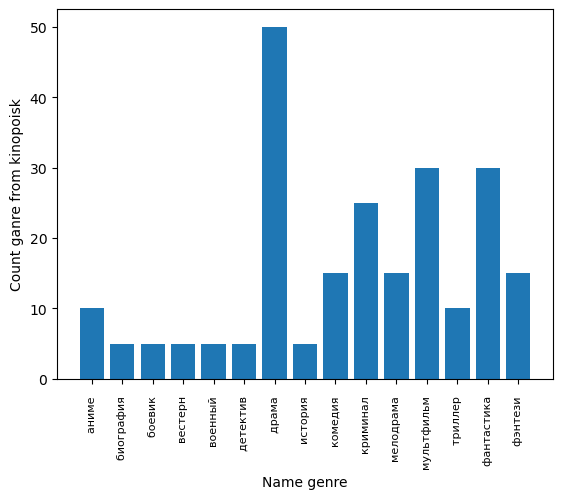

In [16]:
with open('info4.txt','r') as file:
    b = file.readlines()
    df = pd.DataFrame(b)
df.columns = ['first_one']
df = df[df['first_one'].str.contains('Режис')]
new_df = df['first_one'].str.split(' ',expand=True)
new_df.columns = ['country','second_country','values','Name','Surname','lastname']
df1 = new_df['values']
df1 = pd.DataFrame(df1)
df2 = df1['values'].str.split('Р',expand=True)
df3 = df2[0]
df3 = pd.DataFrame(df3)
df3 = df3[df3[0] != '•']
df3.columns = ['All_Genres']
df3
df4 = pd.DataFrame(df3.groupby('All_Genres')['All_Genres'].count())
df4.columns = ['All_Genres_count']
genres = [genre for genre, df4 in df4.groupby('All_Genres')]
plt.bar(genres, df4['All_Genres_count'])
plt.xticks(genres, rotation= 'vertical', size = 8)
plt.ylabel('Count ganre from kinopoisk')
plt.xlabel('Name genre')
plt.show()